**“端到端”学习方式**（end-to-end manner）：整个学习流程并不进行人为的子问题划分，而是完全交给深度学习模型直接学习从原始输入到期望输出的映射。相比分治策略，“端到端”的学习方式具有协同增效的优势，有更大可能获得全局最优解。

用三维张量$x^l\in R^{H^l\times W^l\times D^l}$表示卷积神经网络第$l$层的输入。用三元组$(i^l,j^l,d^l)$来指示该张量对应第$i^l$行，第$j^l$列，第$d^l$通道。由于采用了mini-batch训练策略，网络第$l$层输入通常是一个四维张量，即$x^l\in R^{H^l\times W^l\times D^l\times N}$，其中$N$为mini-batch每一批的样本数。

____
#### 卷积层
若三维情形下的卷积层$l$的输入张量为$x^l\in R^{H^l\times W^l\times D^l}$，该层卷积核为$f^l\in R^{H\times W\times D^l}$。三维输入时卷积操作实际只是将二维卷积扩展到了对应位置的所有通道上（即$D^l$），最终将一次卷积处理的所有$HWD^l$个元素求和作为该位置卷积结果。

卷积操作中涉及的超参数（hyper parameters）：卷积核大小（filter size）、卷积步长（stride）。

卷积是一种局部操作，通过一定大小的卷积核作用于局部图像区域获得图像的局部信息。
____
若原始像素$(x,y)$处可能存在物体边缘，则其四周$(x-1,y)$，$(x+1,y)$，$(x,y-1)$，$(x,y+1)$处像素值应与$(x,y)$处有显著差异。此时，如作用以整体边缘滤波器$K_e$，可消除四周像素值差异小的图像区域而保留显著差异区域，以此可检测出物体边缘信息。
$$K_e=\begin{bmatrix}
0 & -4 & 0\\ 
-4 & 16 & -4\\ 
0 & -4 & 0
\end{bmatrix}$$
类似$K_h$和$K_v$的横向、纵向边缘滤波器可分别保留横向、纵向的边缘信息。
$$K_h=\begin{bmatrix}
1 & 2 & 1\\ 
0 & 0 & 0\\ 
-1 & -2 & -1
\end{bmatrix}$$
$$K_v=\begin{bmatrix}
1 & 0 & -1\\ 
2 & 0 & -2\\ 
1 & 0 & -1
\end{bmatrix}$$

#### 汇合层（pooling）
> 汇合层不包含需要学习的参数，使用时仅需指定汇合类型（average或max等）、汇合操作的核大小（kernel size）和汇合操作的步长（stride）等超参数即可。

汇合操作实际上是一种“降采样（down-sampling）”操作，也可看成用$p-$范数作为非线性映射的“卷积”操作，目的就是减少数据量。

汇合操作的优点：
1. 特征不变性（feature invariant）：使模型更关注是否存在某些特征而不是特征具体的位置，可看作是一种很强的先验，使特征学习包含某种程度自由度，能容忍一些特征微小的位移。
2. 特征降维
3. 在一定程度上防止过拟合，更方便优化。

____
#### 激活函数
> 激活函数的引入为的是增加网络的表达能力（即非线性）。否则，若干线性操作层的堆叠仍然只能起到线性映射的作用，无法形成复杂的函数。

- Sigmoid型函数：$$\sigma (x)=\frac{1}{1+exp(-x)}$$
> 1. 对于大于$5$（或小于$-5$）的值无论多大（或多小）都会压缩到$1$（或$0$）。如此便带来一个严重问题，即梯度的“饱和效应”（saturation effect）。
> 2. 大于$5$（或小于$-5$）部分的梯度接近$0$，这会导致在误差反向传播过程中导数处于该区域的误差将很难甚至根本无法传递至前层，进而导致整个网络无法训练。

- 修正线性单元（Rectified Linear Unit，ReLU）：$$rectifier(x)=max\{0,x\}$$
> 1. ReLU函数有助于随机梯度下降方法收敛。
> 2. 对$x\geq 0$部分完全消除了Sigmoid型函数的梯度饱和效应。

#### 规范化层

#### 全连接层（fully connected layers）
> 在整个卷积神经网络中起到“分类器”的作用。

#### dropout层
1. 加快运算速度，防止过拟合，让网络更加普适。
2. 在训练过程中以一定概率$1-p$将隐藏层节点的输出值清0，而用BP更新权值时，也不再更新与该节点相连的权值。

#### 目标函数
> 用来衡量该预测值与真实样本标记之间的误差。

#### LeNet
1. 应用案例：手写数字识别
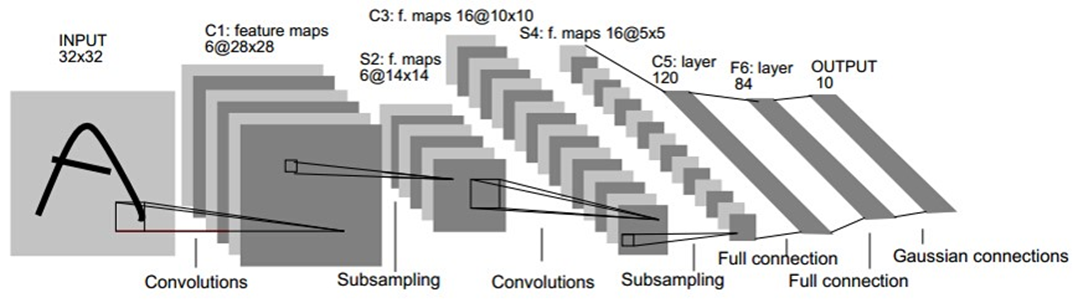

#### VGG-Net
1. 显著特点：特征图的空间分辨率单调递减，通道数单调递增。

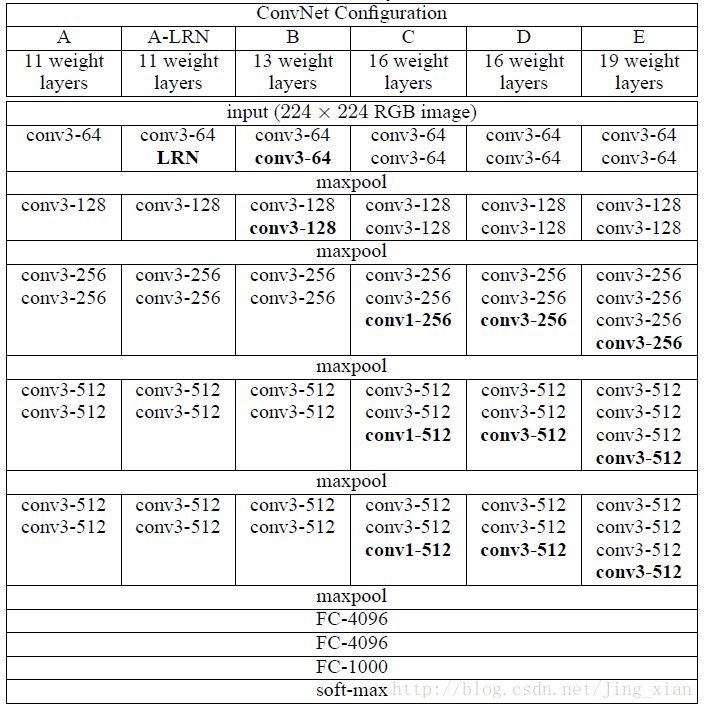

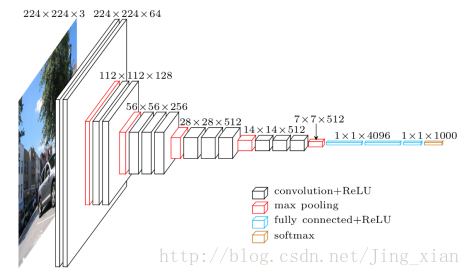

____
对于卷积神经网络而言，输入图像的维度是$H\times W\times 3$（彩色图），或$H\times W\times 1$（灰度图），而最后的全连接层的输入是$1\times 1\times C$的向量，$C$等于分类的类别数。

____
#### Network-In-Network（NIN）
- 与卷积神经网络的最大差异：用多层感知机（多层全连接层和非线性函数的组合）替代了先前卷积网络中简单的线性卷积层。MIN采用了复杂度更高的多层感知机作为层间映射形式，一方面提供了网络层间映射的一种新可能；另一方面增加了网络卷积层的非线性能力，使得上层特征可有更多复杂性与可能性的映射到下层。
- 突破：摒弃了全连接层作为分类层的传统，转而改用全局汇合操作（global average pooling）
- MIN最后一层共$C$张特征图（feature map）对应分类任务的$C$个类别。全局汇合操作分别作用于每张特征图，最后以汇合结果映射到样本真实标记。

#### 残差网络（residual network）

##### 高速公路网络（Highway network）
假设某常规卷积神经网络有$L$层，其中第$i$层（$i\in 1,2,\cdots, L$）的输入为$x^i$，参数为$w^i$，该层的输出$y^i=x^{i+1}$。为了表述简单，忽略层数和偏置，其关系为：$$y=F(x,w_f)$$
其中，$F$为非线性激活函数。

对于高速公路网络而言，$y$的计算定义为：
$$y=F(x,w_f)\cdot T(x,w_t)+x\cdot C(x,w_c)$$
其中，$T(x,w_t)$和$C(x,w_c)$是两个非线性变换，分别称作“变换门”和“携带门”。“变换门”负责控制变换的强度，“携带门”负责控制原始输入信号的保留强度。

在高速公路网络中，设$C=1-T$，上式可表示为：
$$y=F(x,w_f)\cdot T(x,w_t)+x\cdot (1-T(x,w_t))$$

##### 深度残差网络
当高速公路网络中的携带门和变换门都为**恒等映射**时，可表示为：
$$y=F(x,w)+x$$
做简单的变形，可得：
$$F(x,w)=y-x$$

残差学习模块有两个分支，1）左侧的残差函数、2）右侧的对输入的恒等映射。这两个分支经过一个简单整合后，再经过一个非线性的变换ReLU激活函数，从而形成整个残差学习模块。由多个残差模块堆叠而成的网络结构称作**“残差网络”**
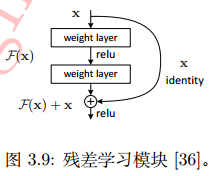

1. 瓶颈残差模块（bottleneck residual block）
> 依次由$3$个$1\times 1$、$3\times 3$、$1\times 1$的卷积层构成，这里$1\times 1$卷积能够起降维或者升维的作用，从而令$3\times 3$的卷积可以在相对较低维度的输入上进行，以达到提高计算效率的目的。在非常深的网络中，其可大量减少计算代价。
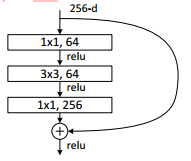

若无近路连接，残差网络实际上就是更深的VGG网络，只不过残差网络以全局平均汇合层（global average pooling layer）替代了VGG网络结构中的全连接层。